##### **1. BUSINESS CONTEXT**

##### **1.1. Business Problem**

Certain key drivers have driven the used car market in Saudi Arabia over the last ten years, including an increase in population, higher disposable incomes, and a shift in people's preference for personal transportation. While the government works on diversifying its economy and gradually reduces its dependence on oil, the automotive sector has emerged as one of the key sectors for investment. Online platforms have revolutionized the way cars are bought and sold, with there being a great increase in digital transactions. All this has made the market more accessible; it creates an avenue for buyers to compare prices and features, thus making the market a lot more transparent and competitive on the part of the seller.

The regulatory environment is also undergoing changes that are supportive of the growth in the used car market. Improvement in consumer protection and vehicle quality has become more regular, with more stringent inspection and certification processes. These are important developments in relation to the building up of consumer trust as buyers are becoming more discreet with the cars they purchase. Another emerging trend in the market is that of sustainability, wherein used vehicles are considered by an increasing number of people as a way to lower their ecological footprint. In essence, it means that just as the used car market keeps taking a leap in growth, so too must the changes in dynamics among stakeholders-either through the form of dealerships or online websites-if they want to maximize an emerging opportunity.

##### **1.2. Objective**

This analysis is aim to develop a predictive model based on multiple factors that can accurately anticipate used automobile prices in Saudi Arabia. By offering reliable pricing predictions, this model will assist buyers and sellers in making well-informed decisions, thereby enhancing efficiency and transparency in the used automobile market.

##### **1.3. Analytical Approach**

predictive model for this analytical approach will be using regression method to predict used car price and model performance will be evaluate using the metric of RMSE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from scipy import stats

In [2]:
df = pd.read_csv('./data_saudi_used_cars.csv')

##### **2. DATA UNDERSTANDING**

The dataset is records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

In [3]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5624.0,2014.101885,5.791606,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5624.0,3.295430,1.515108,1.0,2.0,3.0,4.5,9.0
Mileage,5624.0,150923.375000,382835.963005,100.0,38000.0,103000.0,196000.0,20000000.0
Price,5624.0,53074.058144,70155.340614,0.0,0.0,36500.0,72932.5,850000.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Type,5624,347,Land Cruiser,269
Region,5624,27,Riyadh,2272
Make,5624,58,Toyota,1431
Gear_Type,5624,2,Automatic,4875
Origin,5624,4,Saudi,4188
Options,5624,3,Full,2233


summary : 
- Dataset consist of 10 columns with number of rows 5624 without missing value (non-null)
- There is an anomalies found where the car price is 0. we will perform further check for this.
- There is a possibilities of outliers on column year, price and mileage since the maximum value is far from the median and mean value. the handling of these outliers will adapt and assume based on the business context of used car in saudi arabia.

##### **2.1. Data Distribution**

In [7]:
numerical_cols = df.select_dtypes('number').columns

numerical_cols

Index(['Year', 'Engine_Size', 'Mileage', 'Price'], dtype='object')

In [8]:
categorical_cols = df.select_dtypes('object').columns

categorical_cols

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options'], dtype='object')

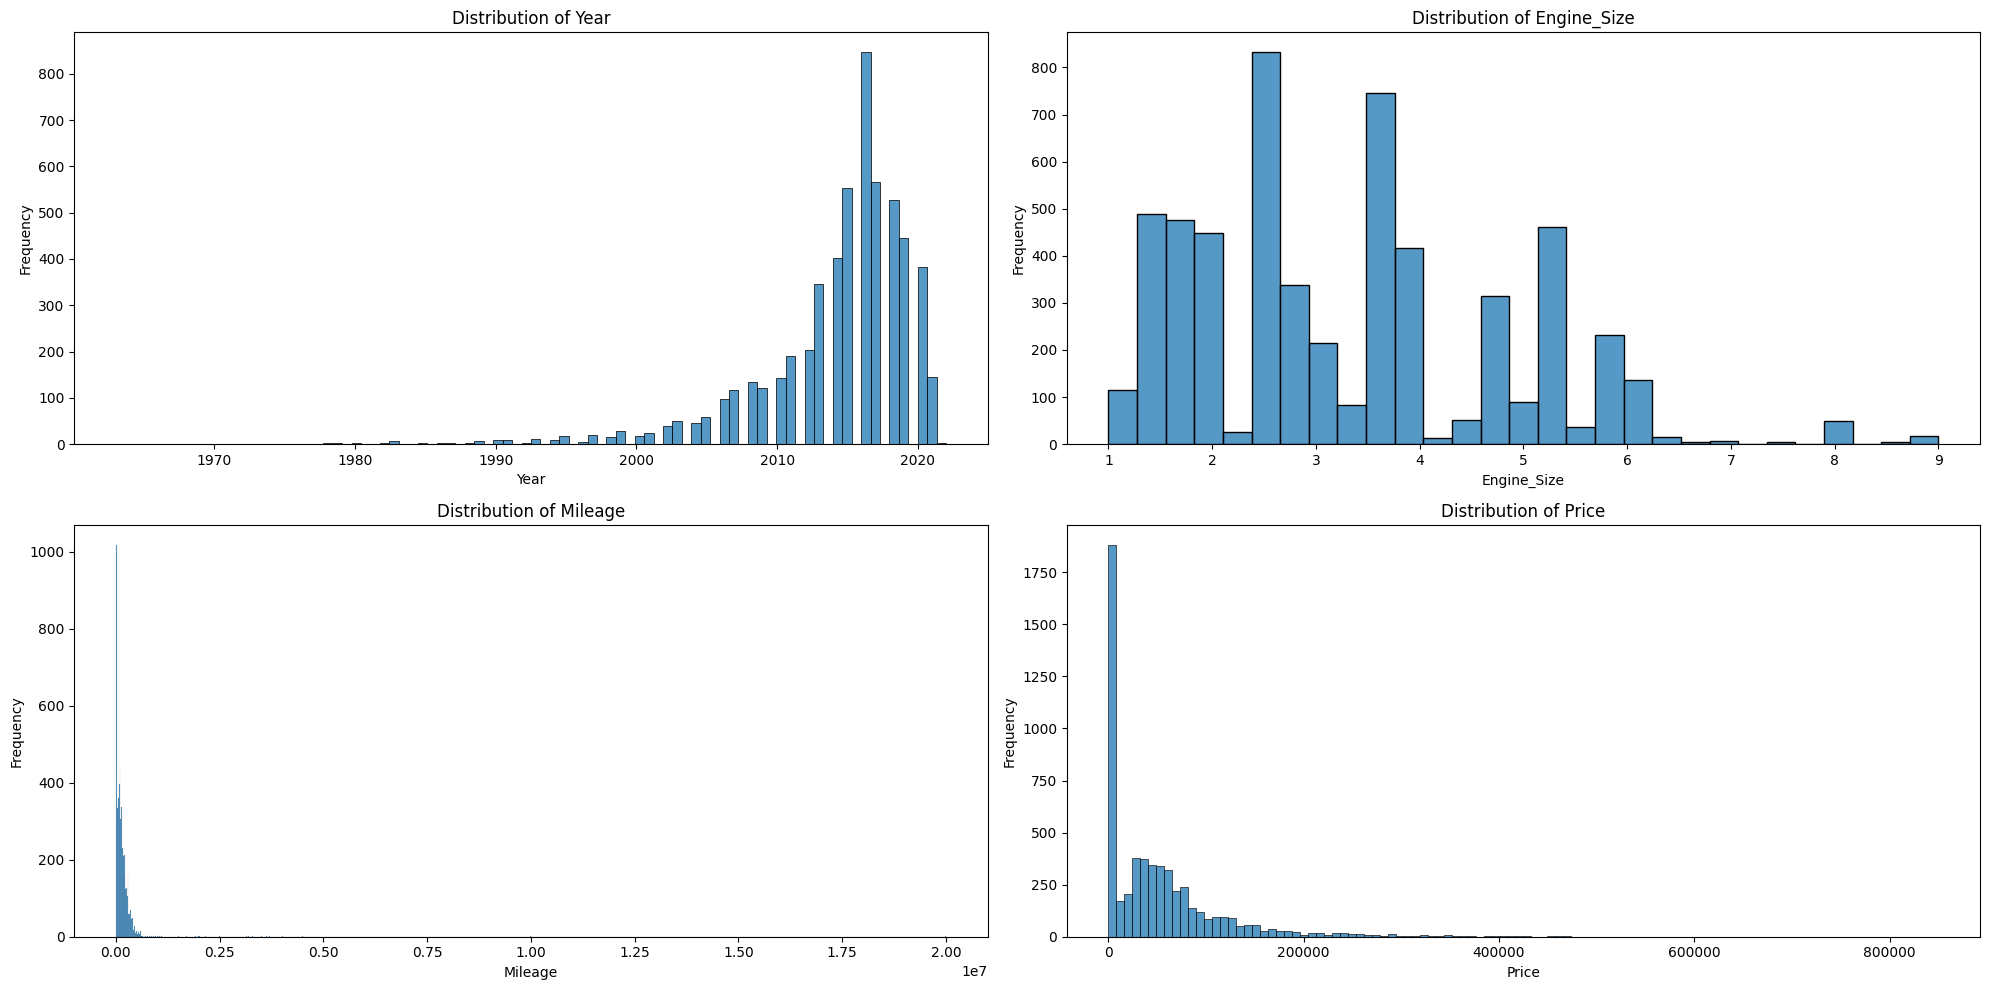

In [9]:
plt.figure(figsize=(20,10))

for index, col in enumerate(numerical_cols, 1) :
    plt.subplot(2, 2, index)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [10]:
distribution_data = {}

for col in numerical_cols :
    shapiro_stats, shapiro_pvalue = stats.shapiro(df[col])
    ks_stats, ks_pvalue = stats.kstest(df[col], 'norm')
    
    distribution_data[col] = {
        'shapiro_pvalue': shapiro_pvalue,
        'ks_pvalue' : ks_pvalue
    }
    
distribution_data

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5624.
  res = hypotest_fun_out(*samples, **kwds)


{'Year': {'shapiro_pvalue': 8.759499557740467e-64, 'ks_pvalue': 0.0},
 'Engine_Size': {'shapiro_pvalue': 1.1949814453363754e-43, 'ks_pvalue': 0.0},
 'Mileage': {'shapiro_pvalue': 9.648936382396995e-94, 'ks_pvalue': 0.0},
 'Price': {'shapiro_pvalue': 6.126504991465864e-71, 'ks_pvalue': 0.0}}

In [11]:
for index, col in enumerate(numerical_cols) : 
    print(f'{index+1}.{col}')
    if distribution_data[col]['shapiro_pvalue'] < 0.05 : 
        print("We assume data is not normal distribution")
    else :
        print("We assume data is normal distribution")
        
    if distribution_data[col]['ks_pvalue'] < 0.05 : 
        print("We assume data is not normal distribution \n")
    else :
        print("We assume data is normal distribution \n")

1.Year
We assume data is not normal distribution
We assume data is not normal distribution 

2.Engine_Size
We assume data is not normal distribution
We assume data is not normal distribution 

3.Mileage
We assume data is not normal distribution
We assume data is not normal distribution 

4.Price
We assume data is not normal distribution
We assume data is not normal distribution 



#### **2.2. Data Correlation**

    2.2.1 Numerical Variable

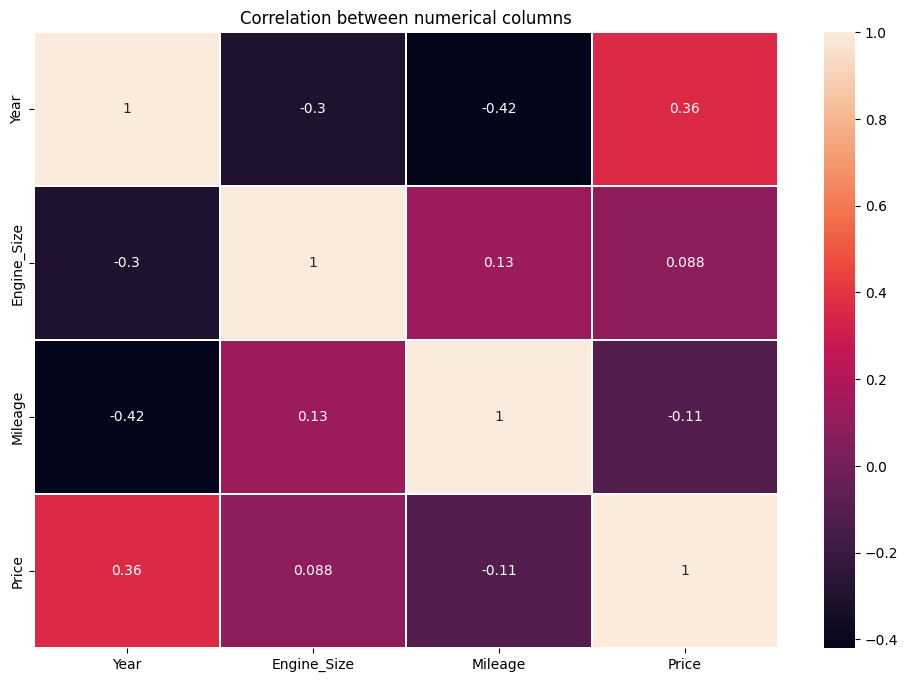

In [12]:
corr = df[numerical_cols].corr('spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidths=0.1)
plt.title('Correlation between numerical columns')
plt.show()

- Year has a moderate correlation to the price, the higher year of car affecting on higher price

    2.2.2 Categorical Variable

In [13]:
from scipy.stats import f_oneway

# Fungsi untuk melakukan uji ANOVA
def perform_anova(df, column):
    groups = [df['Price'][df[column] == category] for category in df[column].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value


for index, var in enumerate(categorical_cols):
    f_stat, p_value = perform_anova(df, var)

    if p_value < 0.05 : 
        print(f'{index + 1}. {var} has no significant effect to price.')
    else : 
        print(f'{index + 1}. {var} has significant effect to price.')

1. Type has no significant effect to price.
2. Region has no significant effect to price.
3. Make has no significant effect to price.
4. Gear_Type has no significant effect to price.
5. Origin has no significant effect to price.
6. Options has no significant effect to price.


##### **3. DATA PREPARATION AND CLEANING**

##### **3.1. Checking Negative Values**

In [14]:
pd.DataFrame({
    'column' : df.columns.values,
    'type' : df.dtypes.values,
    'null_value' : df.isnull().sum().values,
    'negative_value' : [True if df[i].dtypes == int and df[i].any() < 0 else False for i in df.columns],
    'n_unique' : [df[i].nunique() for i in df.columns],
    'sample_unique' : [df[i].unique()[:4] for i in df.columns]
})

,column,type,null_value,negative_value,n_unique,sample_unique
0,Type,object,0,False,347,"[Corolla, Yukon, Range Rover, Optima]"
1,Region,object,0,False,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer]"
2,Make,object,0,False,58,"[Toyota, GMC, Land Rover, Kia]"
3,Gear_Type,object,0,False,2,"[Manual, Automatic]"
4,Origin,object,0,False,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,False,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,False,50,"[2013, 2014, 2015, 2020]"
7,Engine_Size,float64,0,False,71,"[1.4, 8.0, 5.0, 2.4]"
8,Mileage,int64,0,False,1716,"[421000, 80000, 140000, 220000]"
9,Negotiable,bool,0,False,2,"[True, False]"


##### **3.2. Duplicated Data**

In [15]:
df.duplicated().sum()

4

In [16]:
df.iloc[df[df.duplicated() == True].index]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [17]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

##### **3.3. Anomalies and Unnecessary Column**

In [18]:
deleted_index1 = df[df['Origin'] == 'Unknown'].index

len(deleted_index1)

61

In [19]:
df.drop(index=deleted_index1, inplace=True)

In [20]:
deleted_index2 = df[df['Price'] == 0].index

len(deleted_index2)

1751

In [21]:
df.drop(index=deleted_index2, inplace=True)

In [22]:
df.drop(columns='Negotiable',inplace=True)

df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [23]:
df.reset_index(drop=True, inplace=True)

##### **3.4. Checking and Handling Outliers**

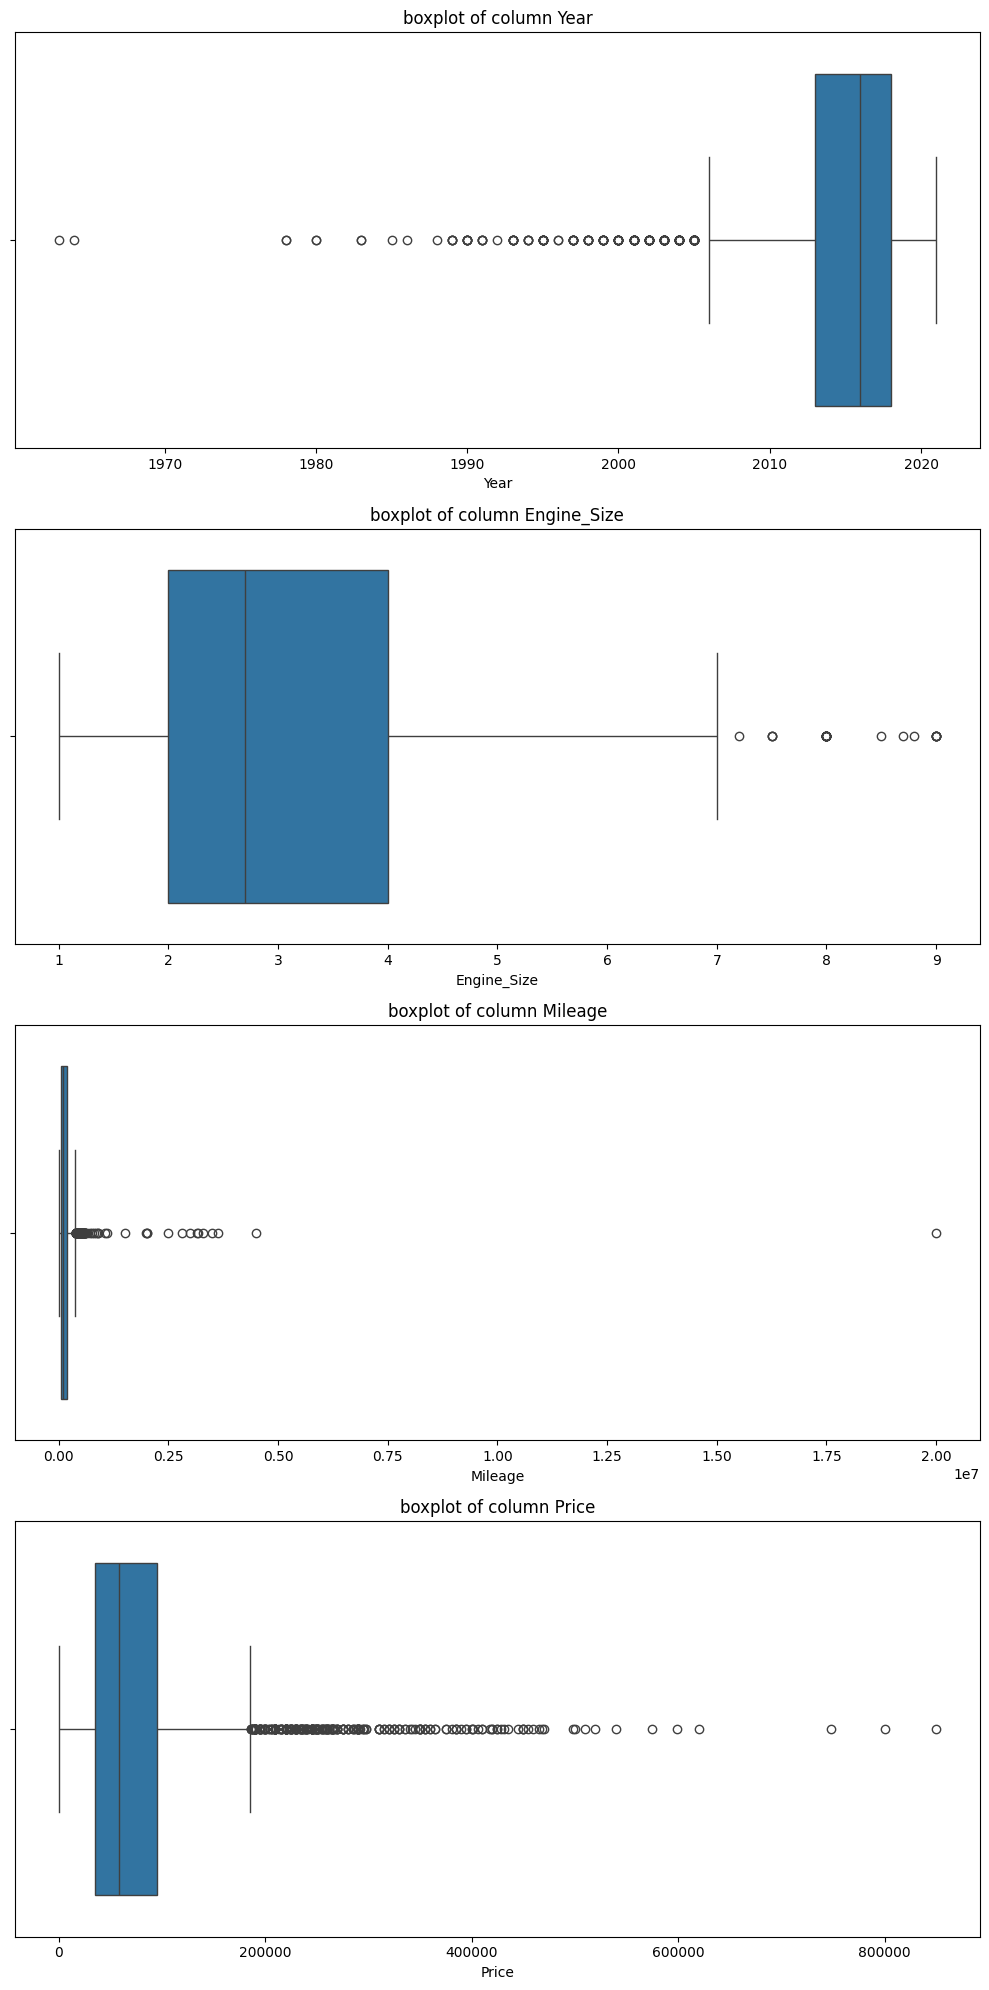

In [24]:
# checking outliers using boxplot

plt.figure(figsize=(10,20))
for index, col in enumerate(numerical_cols,1) :
    plt.subplot(4, 1, index) 
    sns.boxplot(data=df, x=df[col])
    plt.title(f'boxplot of column {col}')

plt.tight_layout()
plt.show()

In [25]:
def outliers_cal(df, col) :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


In [26]:
outliers_data = []

for index, col in enumerate(numerical_cols) : 
    outliers, lower_bound, upper_bound = outliers_cal(df, col)
    
    total_outliers = len(outliers)
    percentage_outliers = total_outliers / len(df) * 100
    
    outliers_data.append([col, total_outliers, percentage_outliers, lower_bound, upper_bound])

In [27]:
pd.DataFrame(outliers_data, columns='column total_outlier percentage lower_bound upper_bound'.split())

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,182,4.779412,2005.50,2025.50
1,Engine_Size,30,0.787815,-1.00,7.00
2,Mileage,130,3.413866,-153290.25,383483.75
3,Price,253,6.643908,-55000.00,185000.00


for the outliers i will handle it based on reference from syarah.com as below 

**Price, Mileage and Year Threshold by Website Syarah.com** <br><br> 
 <br>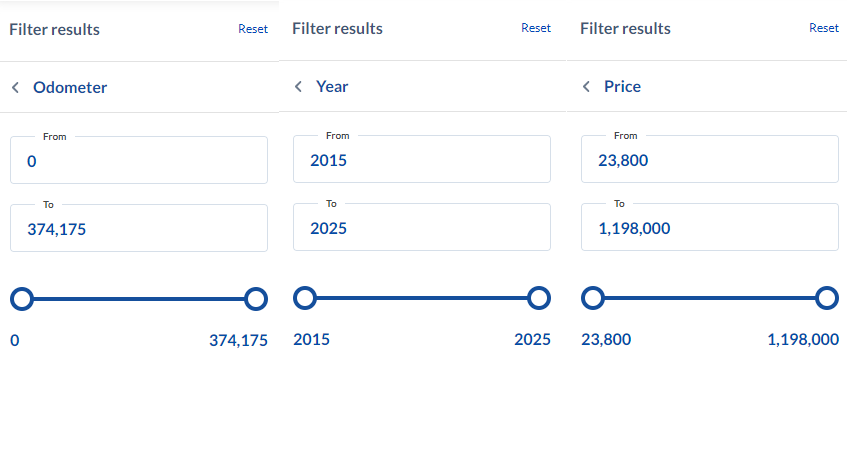


- the year reference maximum is 10 years old difference, so i'll remove the car with year more than 10 years old based from dataset maximum year of car. based on dataset the maximum year value is 2022 so the threshold will be : 2012 - 2022

- for Engine Size will following the reference from the upper_bound of outliers value which is 6.5.

- for mileage will be accordance from syarah.com so the threshold will be : 0 - 374.175
- for price will be accordance from syarah.com so the threshold will be : 23.800 - 1.198.000

In [28]:
# defining the threshold based on Syarah.com
threshhold = (df['Price'] >= 23800) & (df['Price'] <= 1198000)& (df['Mileage'] >= 0) & (df['Mileage'] <= 374175) & (df['Year'] >= 2012) & (df['Engine_Size'] <= 6.5)

In [29]:
# Dataframe inside the threshold
df_threshold = df[threshhold]
df_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
5,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
3802,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
3803,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3805,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3806,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [30]:
# Access the dataframe outside the threshold
outside_threshold = df[~(threshhold)]
outside_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
8,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2011,4.6,79000,145000
9,LS,Dammam,Lexus,Automatic,Saudi,Full,2008,4.6,299000,38000
13,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
16,Focus,Khobar,Ford,Automatic,Gulf Arabic,Standard,2014,1.6,98000,23000
...,...,...,...,...,...,...,...,...,...,...
3791,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000
3795,Land Cruiser,Al-Baha,Toyota,Automatic,Gulf Arabic,Full,2006,4.6,285,65000
3798,Land Cruiser 70,Taef,Toyota,Manual,Saudi,Full,2020,4.0,45000,2450
3800,Azera,Riyadh,Hyundai,Automatic,Other,Semi Full,2011,3.5,447,21000


In [31]:
# dropping the data outside the threshold 
df.drop(outside_threshold.index, inplace=True)
df.reset_index(drop=True, inplace=True)


In [38]:
outliers_data_after = []

for index, col in enumerate(numerical_cols) : 
    outliers, lower_bound, upper_bound = outliers_cal(df, col)
    
    total_outlier = len(outliers)
    
    outlier_percentage = round(total_outlier/len(df) * 100, 2)
    
    outliers_data_after.append([col, total_outlier, outlier_percentage, lower_bound, upper_bound])

In [39]:
pd.DataFrame(outliers_data_after, columns='column total_outlier percentage lower_bound upper_bound'.split())

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,0,0.00,2010.5,2022.5
1,Engine_Size,0,0.00,-0.7,6.5
2,Mileage,73,0.02,-105000.0,303000.0
3,Price,207,0.07,-50062.5,204437.5


In [34]:
df.shape

(2956, 10)